In [70]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import os
import glob
import math
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [71]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2013,11,13)
end = datetime.datetime(2023,11,12)
data = yf.download(tickers, start=start, end=end)
print(data)

[*********************100%***********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-11-13 00:00:00 -> 2023-11-12 00:00:00)')



             Adj Close                                                  
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2013-11-13   33.621342  21.975304   16.301144   31.766470         NaN  \
2013-11-14   33.187923  22.305262   16.536905   31.892597         NaN   
2013-11-15   36.070690  22.522091   16.437660   32.158150         NaN   
2013-11-18   35.492828  23.002890   16.238514   32.443615         NaN   
2013-11-19   35.341793  22.842630   16.267326   32.171429         NaN   
...                ...        ...         ...         ...         ...   
2023-11-06  107.529999  11.660000  178.994186  141.199997  118.169998   
2023-11-07  110.540001  11.750000  181.580780  142.160004  121.080002   
2023-11-08  109.389999  12.010000  182.649368  142.029999  117.660004   
2023-11-09  107.739998  11.750000  182.169998  138.039993  115.519997   
2023-11-10  108.470001  11.800000  186.399994  138

In [72]:
close_data = data['Adj Close']

In [73]:
# 열기준 결측치 제거
df = close_data.dropna(axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 2013-11-13 00:00:00 to 2023-11-10 00:00:00
Columns: 466 entries, A to ZTS
dtypes: float64(466)
memory usage: 9.0+ MB
None


In [74]:
from sklearn.preprocessing import StandardScaler
# 종가 데이터를 수익롤 데이터로 변환
refined_data = np.log(df).diff(1).dropna()

# 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(refined_data)
refined_data = pd.DataFrame(scaled_data, columns=refined_data.columns)

In [75]:
refined_data

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,-0.814131,0.482661,0.747303,0.198904,-0.047618,0.246043,-0.338892,-0.370574,-0.019791,0.833508,...,-0.315967,0.182289,0.377734,0.521679,0.075260,0.106472,0.423907,0.126787,0.182745,-0.120991
1,5.017112,0.316069,-0.390011,0.453914,0.487890,-0.224109,0.770804,0.108560,0.310742,-2.200807,...,-0.400199,-0.005080,1.238693,0.088952,0.126415,0.541236,0.181730,0.188605,0.109786,0.210336
2,-1.006447,0.680812,-0.734335,0.486061,-0.225576,-0.193215,0.377587,-0.691307,-0.630760,0.562338,...,0.045792,0.021609,0.096324,-0.137404,-0.940733,-0.533865,-0.657362,-0.092445,-0.484793,-0.413469
3,-0.286517,-0.214850,0.044865,-0.530745,1.329509,-0.214647,-0.083330,-0.770227,-0.722168,0.025325,...,-0.867322,-0.379610,-0.030303,-0.377044,0.335822,0.301564,0.222346,0.016723,-0.980383,-0.435400
4,-0.355449,-0.216434,-0.544970,-0.657655,-0.962333,-0.426486,-0.301275,0.103656,-0.422141,-1.674355,...,-0.157363,-1.084854,-0.459961,-0.356802,0.230607,-1.335931,-0.444852,0.373360,0.143509,-0.141438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.861770,-0.854649,0.755131,-0.126203,-0.625244,-0.315886,-0.125334,0.109892,-0.139044,-0.321195,...,0.820293,-0.622430,-1.040458,-1.227333,-0.497625,-0.001645,0.289533,-1.604293,-0.714911,0.314389
2511,1.644038,0.252832,0.746633,0.364614,-0.172277,0.143344,0.397082,1.638321,0.137776,-0.409255,...,-0.662192,-0.958318,-0.921063,-0.299071,0.344963,-0.500568,-1.843085,0.369461,-0.104571,1.451261
2512,-0.661672,0.705126,0.273397,-0.088391,-0.072541,-0.967931,0.503683,-0.036411,0.217642,-0.089832,...,-0.090180,-0.995552,-0.722950,-1.401871,-0.003303,0.040235,-0.601756,-0.332246,0.081649,1.314739
2513,-0.948819,-0.689373,-0.200735,-1.712905,-0.884817,0.362878,-0.789046,-0.684138,-0.583083,0.092236,...,-0.781089,-0.524781,0.004527,-0.850918,-0.021568,-0.498269,-0.421685,-0.791978,-1.543942,-0.129877


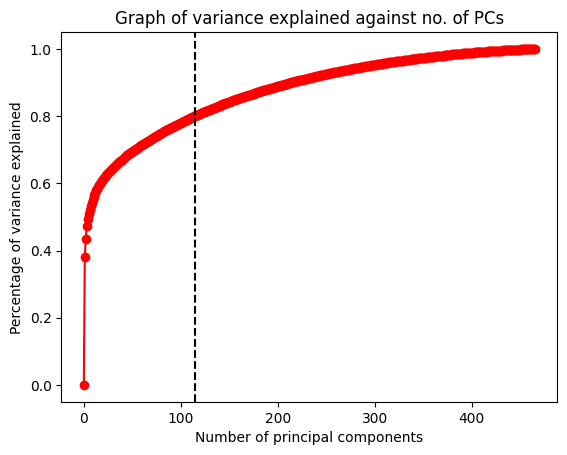

Total percentage variance explained with 115 principal components: 0.801


            PC1       PC2       PC3       PC4       PC5
0     -6.028462  3.160689  3.164764  0.692670  0.363364
1     -4.600414  0.715543 -1.144284 -0.110090 -0.251016
2      5.881339 -0.116594  2.671961  0.829064  2.183761
3      5.353406 -1.342240  0.749839  1.498338  0.545029
4      4.513291 -3.988369 -2.908789  0.911696  0.538799
...         ...       ...       ...       ...       ...
2510   5.951204  0.909083 -2.456991  2.603052  0.478620
2511   3.168312  0.763205 -6.203004 -1.575697  3.475748
2512   1.335955  0.769614 -2.812986 -1.838708  1.962436
2513  10.209840 -3.255997  1.319632  1.674461 -0.057612
2514 -13.092749 -1.312315 -3.451615 -1.663483 -0.593101

[2515 rows x 5 columns]


In [76]:
def optimise_pca(norm):
    explained_var = []
    principal_components = []
    for i in range(0,len(norm.columns),1): # For loop from 0 to 49 principal components to calculate their respective percentage of variance.

        # Initialise the PCA function with the i number of principal components.
        pca_model = PCA(n_components=i) 
        
        # Fits the model with norm and applies PCA on norm to return dataset with i number of principal components
        pca_model.fit_transform(norm)

        # Using the attribute ".explained_variance_ratio" returns percentage of variance explained by each selected component.
        # This result is then summed up to obtained percentage of variance explained for i number of components.
        # It is appended into explained_var to be plotted as the y-axis.
        explained_var.append(sum(pca_model.explained_variance_ratio_)) 
        
        # The number of principal components, i, is appended to principal_components to be plotted as the x-axis.
        principal_components.append(i)

    # Plot graph of "Percentage of variance explained" against "Number of principal components"
    # Using this graph, the optimal number of dimensions can be found via the elbow method
    plt.plot(principal_components, explained_var, color="red", marker="o")
    plt.title("Graph of variance explained against no. of PCs")
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage of variance explained")
    plt.axvline(115, color='black', linestyle='--')
    plt.show()

def pca(norm, symbols, n):

    # Initialise the PCA function with the n number of principal components.
    pca_model = PCA(n_components=n)

    # Fits the model with norm and applies PCA on norm to return dataset with n number of principal components
    components = pca_model.fit_transform(norm)

    # print(f"{n} largest eigenvalues of the covariance matrix:\n{pca_model.explained_variance_}")
    # print(f"Percentage of variance explained by each component:\n{pca_model.explained_variance_ratio_}")
    print(f"Total percentage variance explained with {n} principal components: {round(sum(pca_model.explained_variance_ratio_),3)}\n")
    print()

    # Create dataset (that has been reduced to n number of principal components) in proper format using pd.Dataframe(data,columns,index): 
    pca_df = pd.DataFrame(components, columns=[f"PC{k}" for k in range(1,n+1)],index=symbols)
    return pca_df

norm_symbols = refined_data.index
optimise_pca(refined_data) 

pca_df = pca(refined_data, norm_symbols, n=115)
print(pca_df.iloc[:,:5])

## PC1

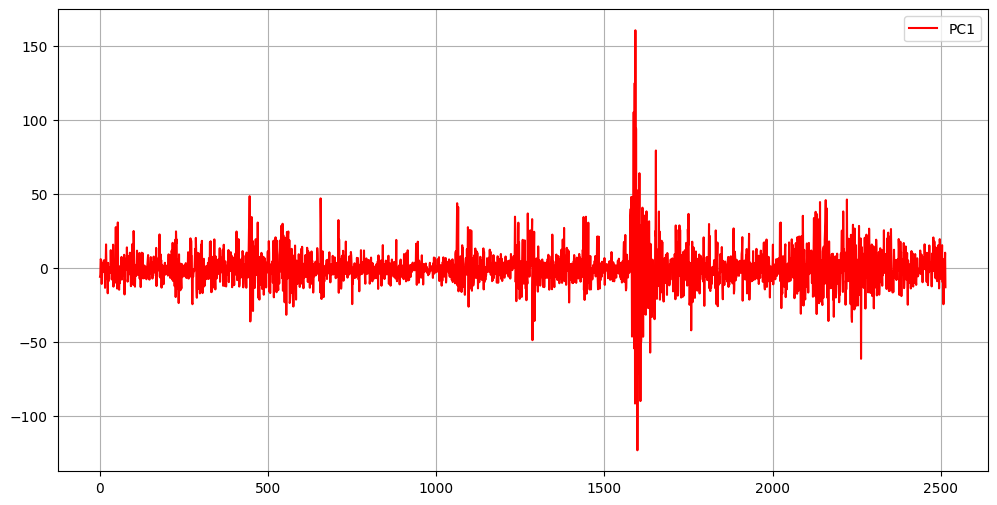

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(pca_df['PC1'], label='PC1', color='red')
plt.legend()
plt.grid(True)
plt.show()

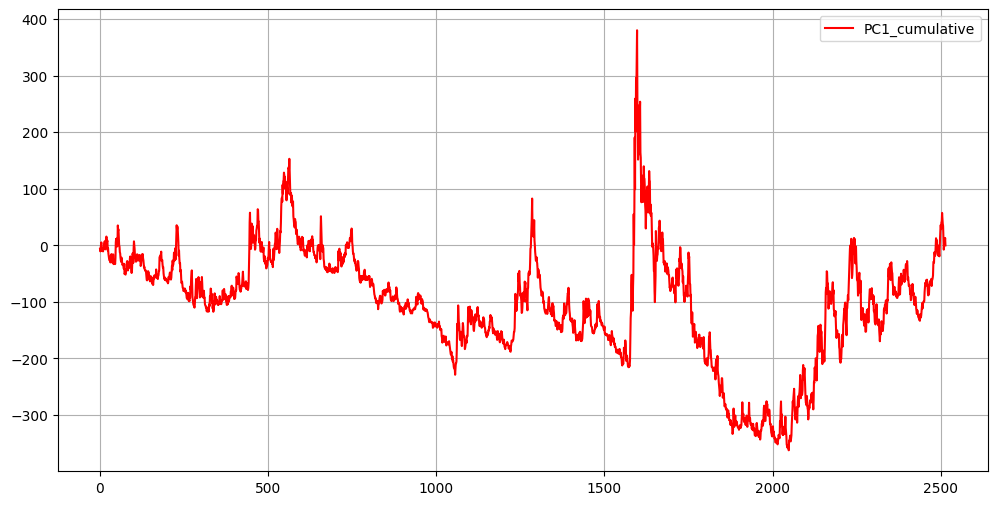

In [78]:
Cumulative_df = pca_df['PC1'].cumsum()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df, label='PC1_cumulative', color='red')
plt.legend()
plt.grid(True)
plt.show()

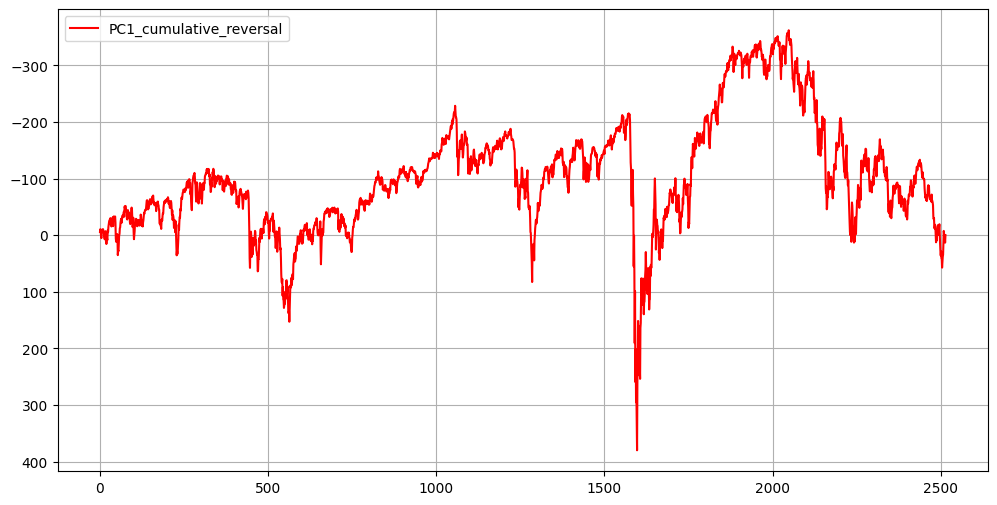

In [79]:
Cumulative_df1 = pca_df['PC1'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC1_cumulative_reversal', color='red')
plt.legend()
plt.grid(True)

# 현재 y축의 최대 및 최소값을 얻고, 이를 반전시킴
y_min, y_max = plt.gca().get_ylim()
plt.ylim(y_max, y_min)

plt.show()

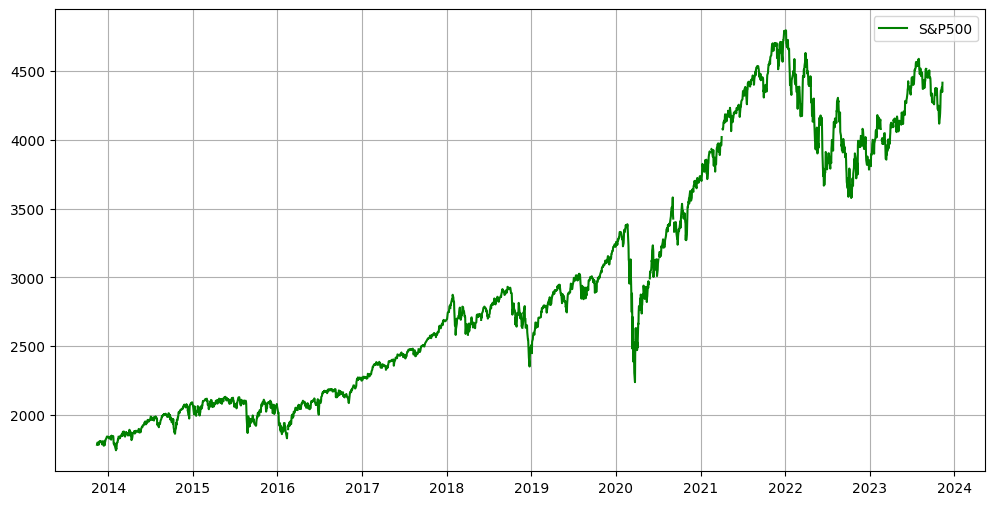

In [80]:
index_df = pd.read_excel(r'C:\Users\user\Desktop\Factor analysis WS\S&P 500.xlsx', index_col=0)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(index_df, label='S&P500', color='green')
plt.legend()
plt.grid(True)
plt.show()

## PC2

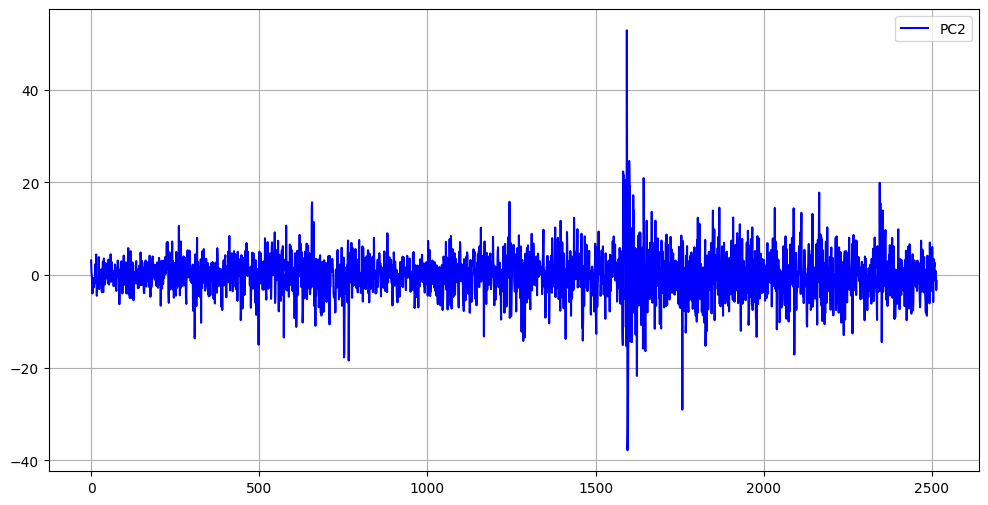

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(pca_df['PC2'], label='PC2', color='blue')
plt.legend()
plt.grid(True)
plt.show()

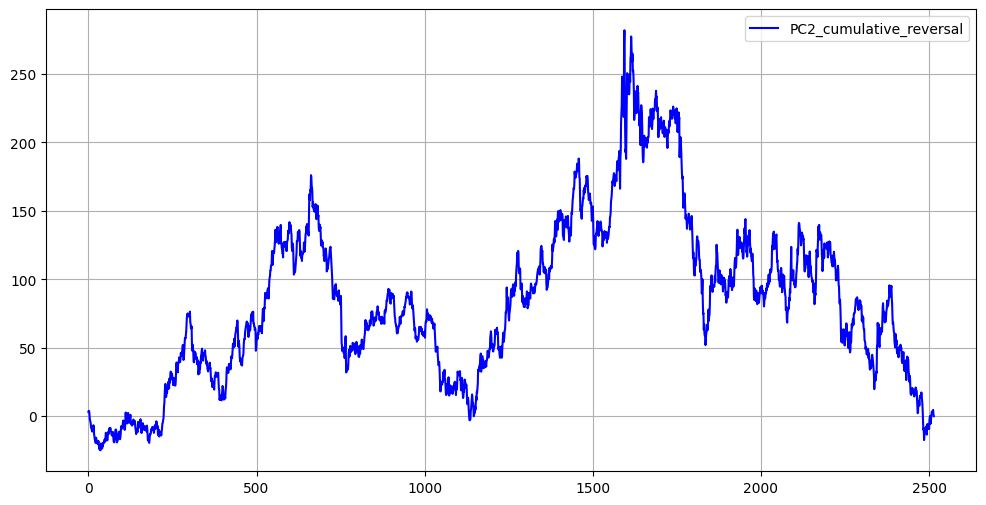

In [82]:
Cumulative_df1 = pca_df['PC2'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC2_cumulative_reversal', color='blue')
plt.legend()
plt.grid(True)

plt.show()

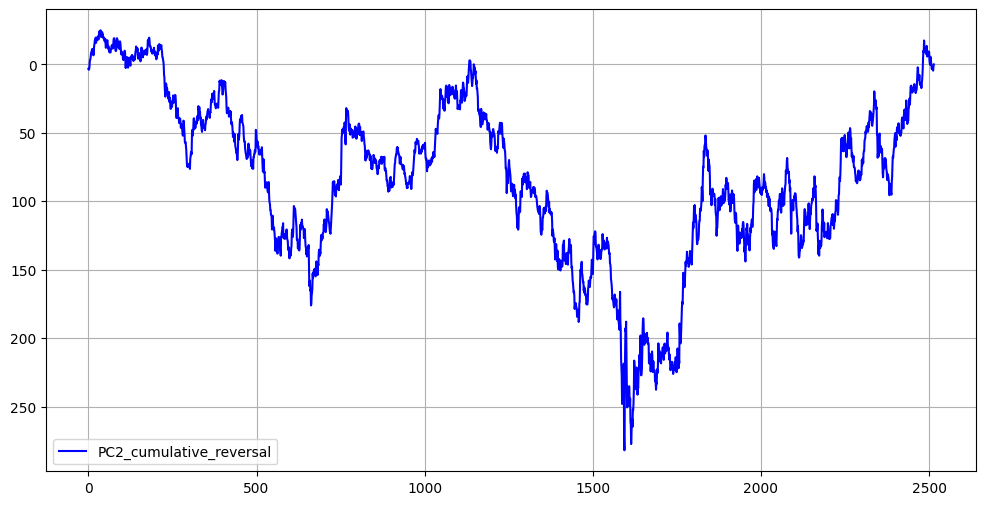

In [83]:
Cumulative_df1 = pca_df['PC2'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC2_cumulative_reversal', color='blue')
plt.legend()
plt.grid(True)

# 현재 y축의 최대 및 최소값을 얻고, 이를 반전시킴
y_min, y_max = plt.gca().get_ylim()
plt.ylim(y_max, y_min)

plt.show()

## PC3

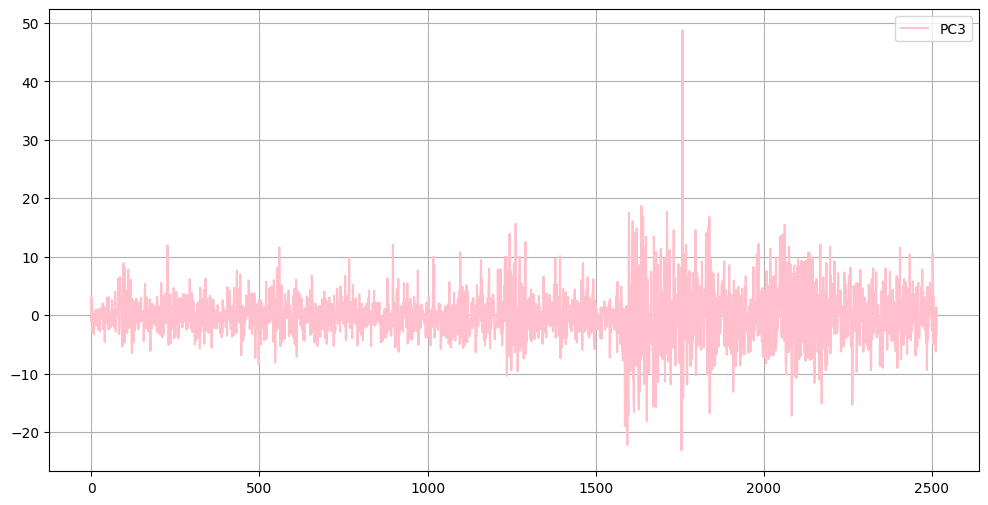

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(pca_df['PC3'], label='PC3', color='pink')
plt.legend()
plt.grid(True)
plt.show()

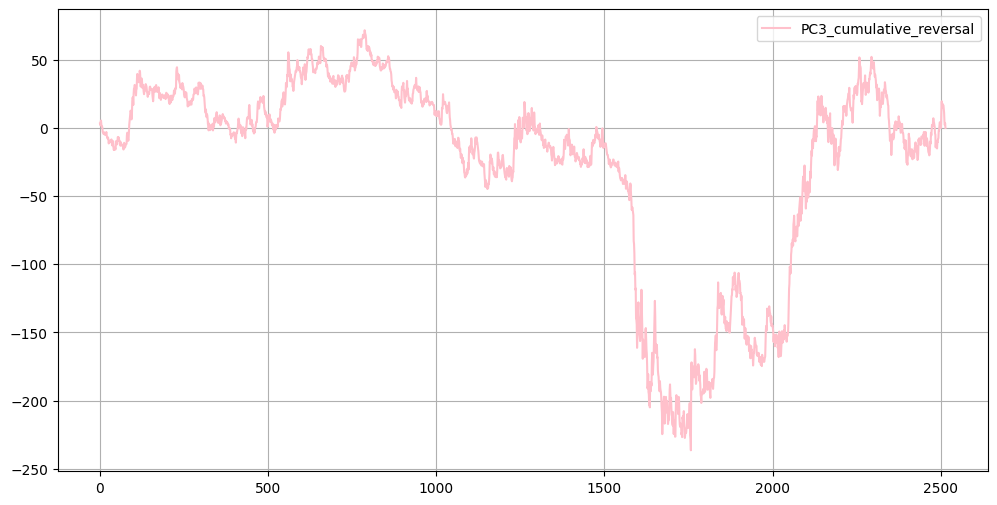

In [85]:
Cumulative_df1 = pca_df['PC3'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC3_cumulative_reversal', color='pink')
plt.legend()
plt.grid(True)

plt.show()

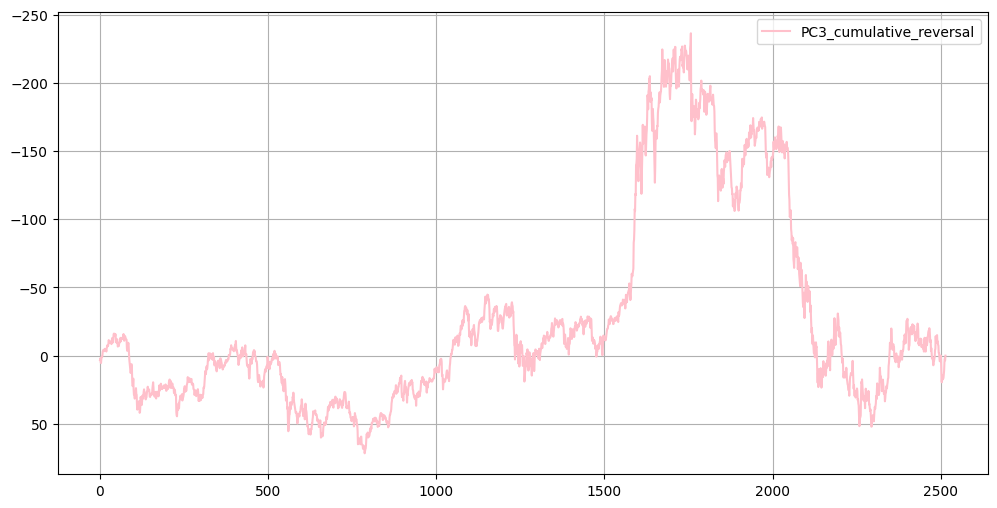

In [86]:
Cumulative_df1 = pca_df['PC3'].cumsum()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Cumulative_df1, label='PC3_cumulative_reversal', color='pink')
plt.legend()
plt.grid(True)

# 현재 y축의 최대 및 최소값을 얻고, 이를 반전시킴
y_min, y_max = plt.gca().get_ylim()
plt.ylim(y_max, y_min)

plt.show()

## 베타

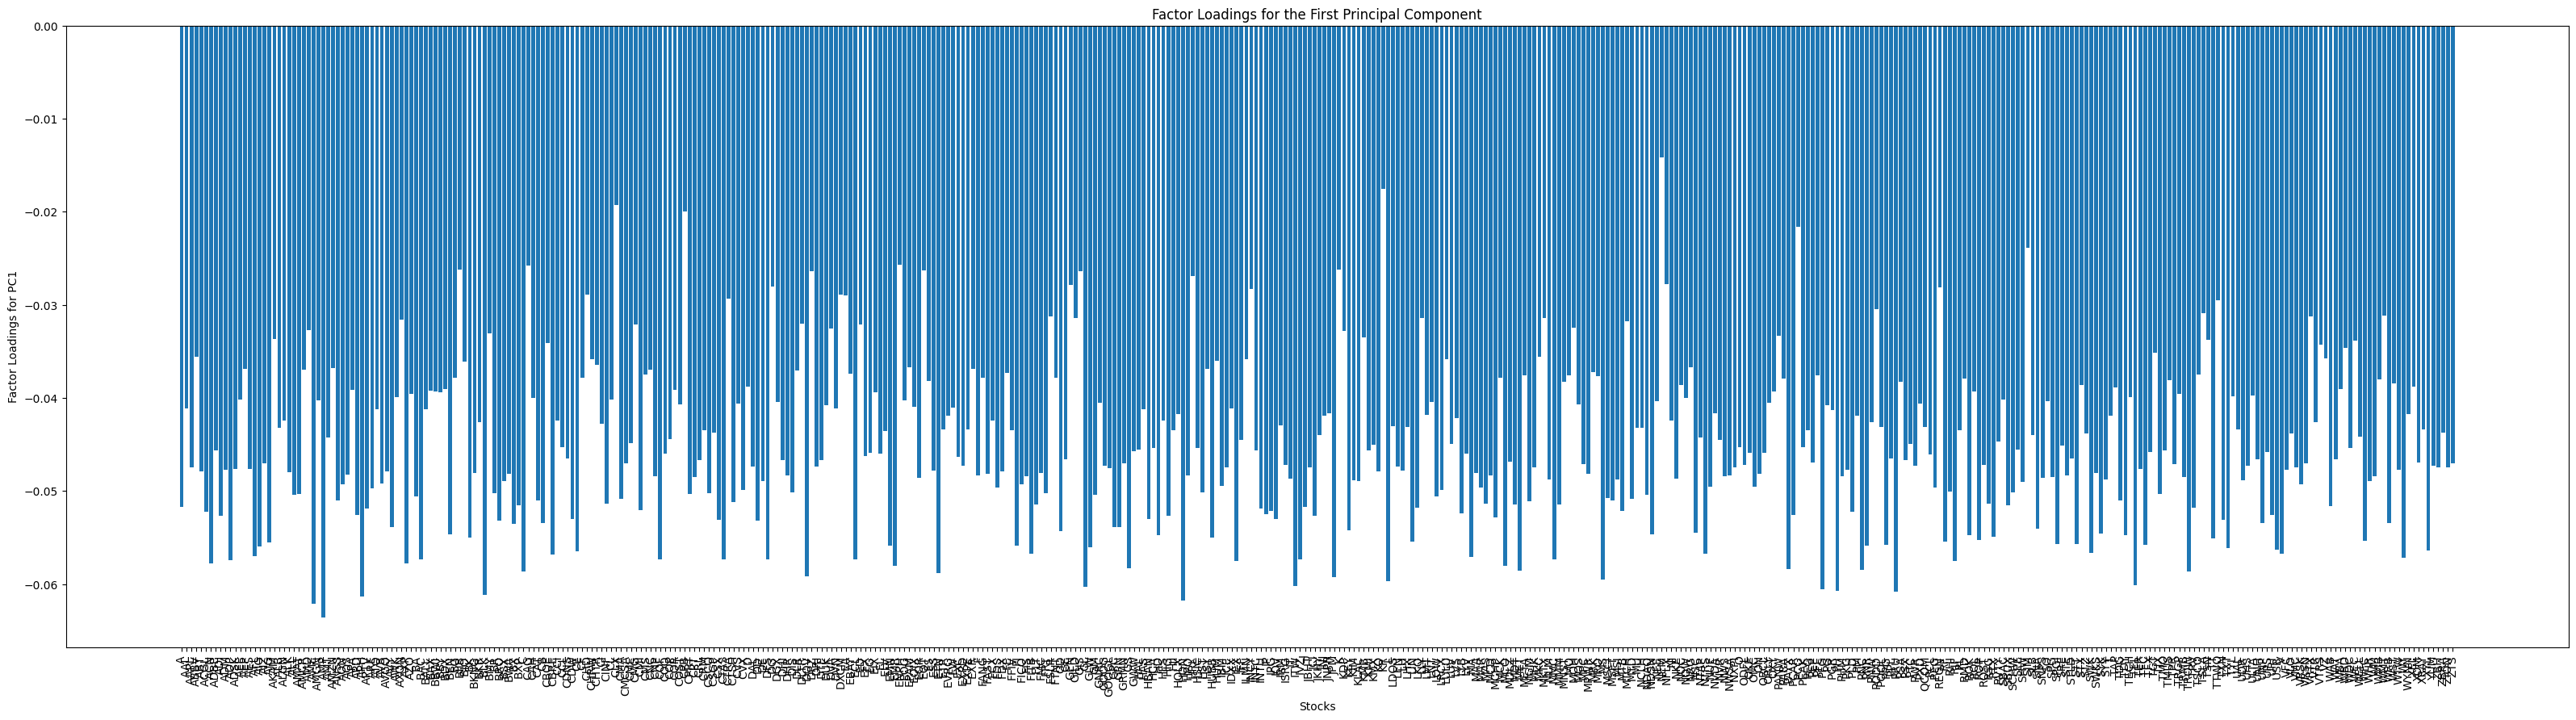

In [162]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca = PCA(115)
pca.fit(refined_data)

# Get the factor loadings for the first principal component
factor_loadings = pca.components_[0]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC1')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), refined_data.columns, rotation='vertical')
plt.show()

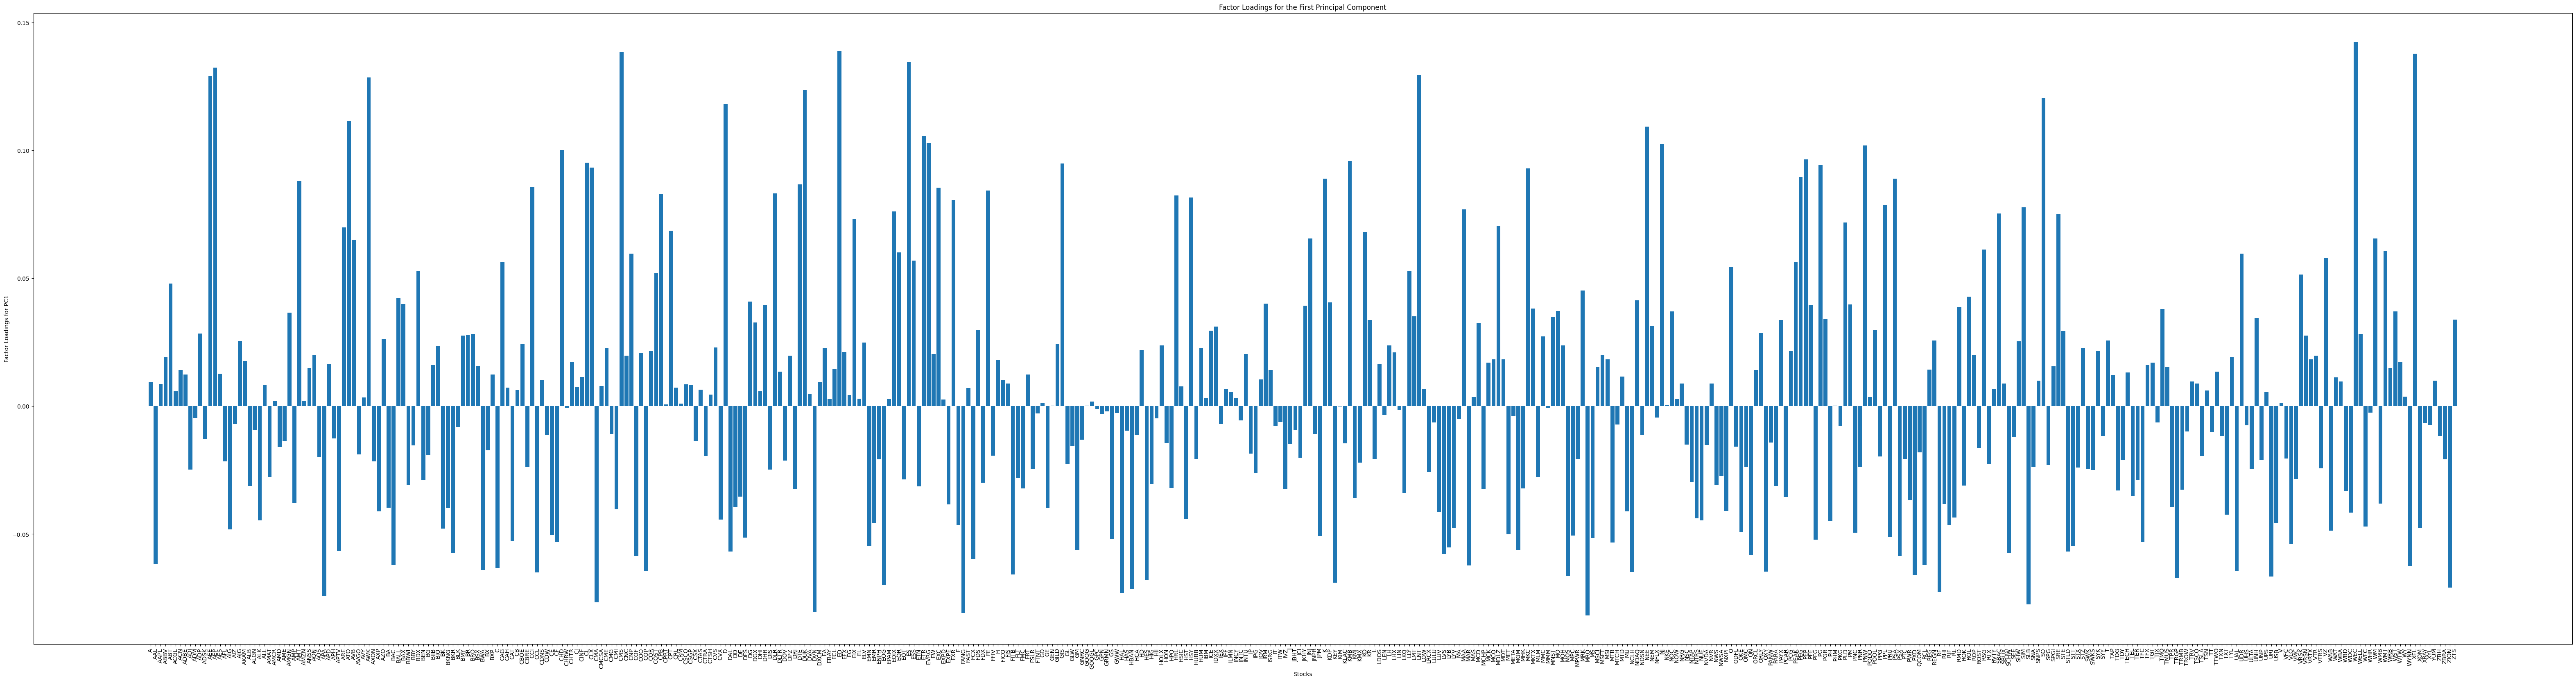

In [171]:
factor_loadings = pca.components_[1]

# Visualize the factor loadings
plt.figure(figsize=(80,20))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC1')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), refined_data.columns, rotation='vertical')
plt.show()

In [172]:
factor_loading_df = pd.DataFrame({'Column': refined_data.columns, 'Factor Loadings': factor_loadings})
factor_loading_df

,Column,Factor Loadings
0,A,0.009511
1,AAL,-0.061788
2,AAPL,0.008721
3,ABBV,0.019069
4,ABT,0.048033
...,...,...
461,YUM,0.010051
462,ZBH,-0.011621
463,ZBRA,-0.020791
464,ZION,-0.070994


In [173]:
sorted_factor_loading_df = factor_loading_df.reindex(factor_loading_df['Factor Loadings'].abs().sort_values(ascending=False).index)

sorted_factor_loading_df

,Column,Factor Loadings
445,WEC,0.142548
139,ED,0.138765
95,CMS,0.138540
457,XEL,0.137873
153,ES,0.134644
...,...,...
84,CHRW,-0.000504
182,GEN,0.000275
189,GOOG,0.000166
340,PHM,0.000161


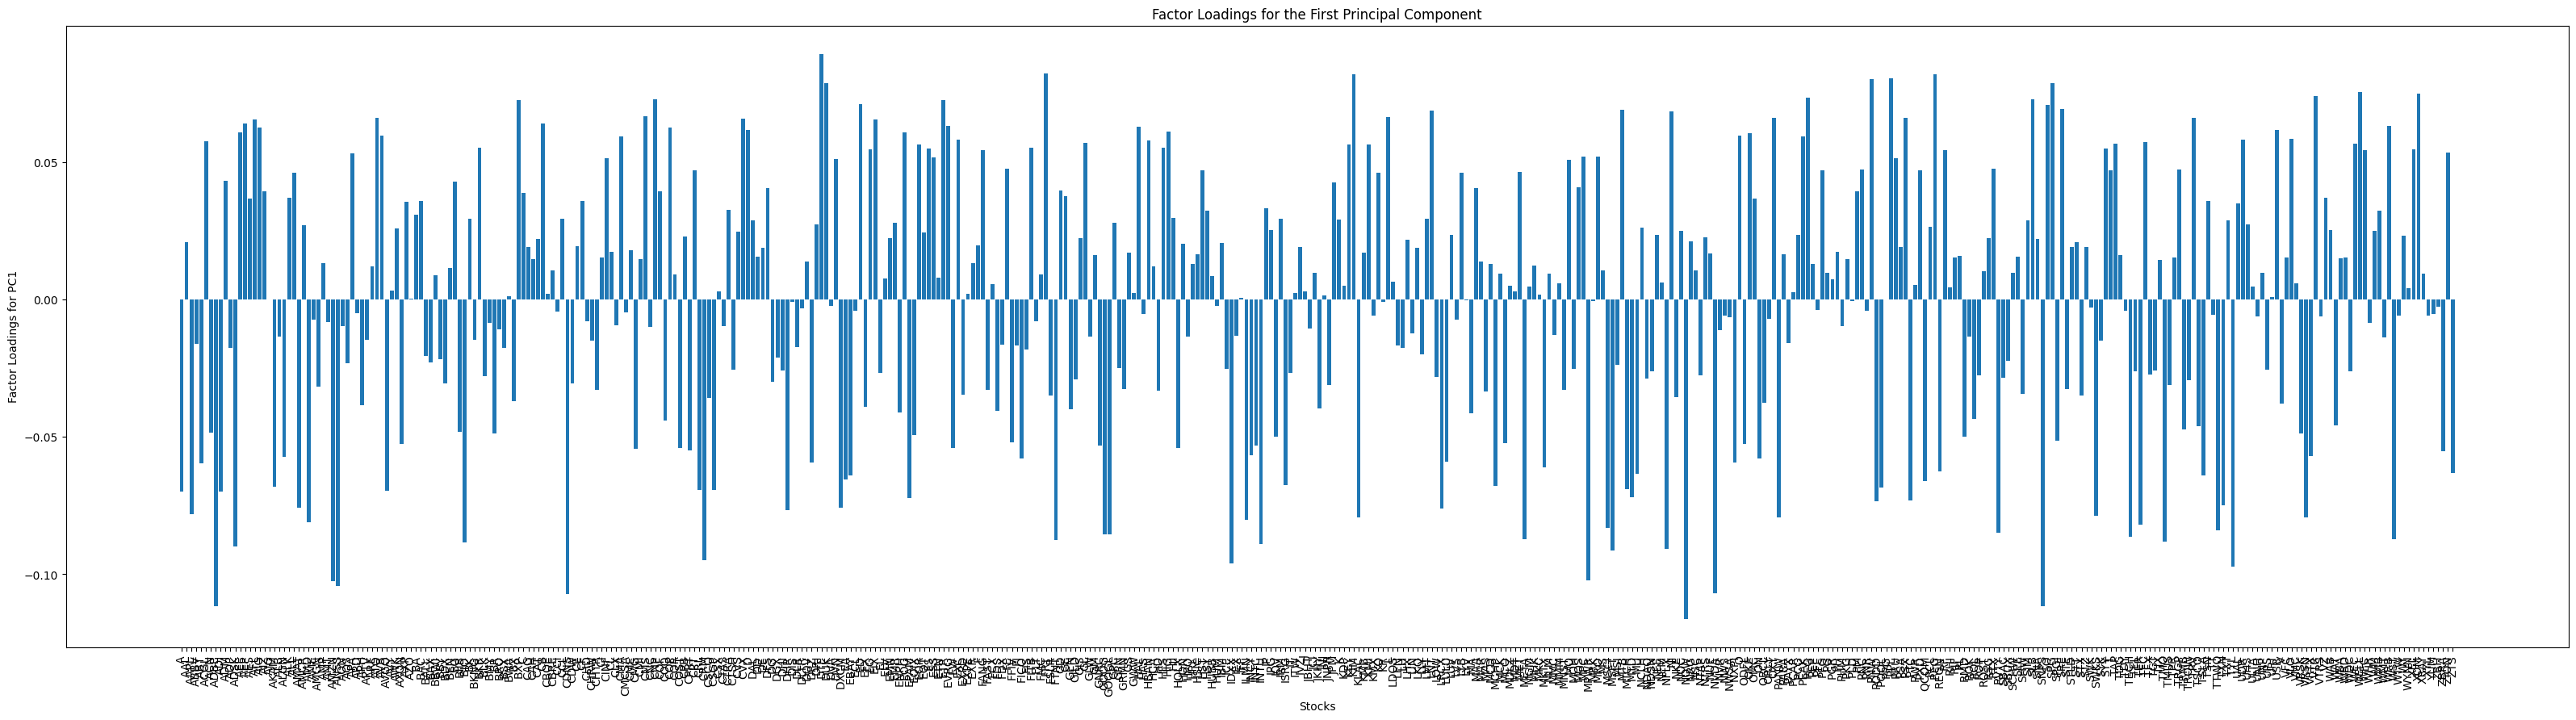

In [174]:
factor_loadings = pca.components_[2]

# Visualize the factor loadings
plt.figure(figsize=(40,10))
plt.bar(range(len(factor_loadings)), factor_loadings)
plt.xlabel('Stocks')
plt.ylabel('Factor Loadings for PC1')
plt.title('Factor Loadings for the First Principal Component')
plt.xticks(range(len(factor_loadings)), refined_data.columns, rotation='vertical')
plt.show()

In [175]:
factor_loading_df = pd.DataFrame({'Column': refined_data.columns, 'Factor Loadings': factor_loadings})
factor_loading_df

,Column,Factor Loadings
0,A,-0.069893
1,AAL,0.020956
2,AAPL,-0.078249
3,ABBV,-0.016095
4,ABT,-0.059496
...,...,...
461,YUM,-0.005230
462,ZBH,-0.002536
463,ZBRA,-0.055333
464,ZION,0.053613


In [176]:
sorted_factor_loading_df = factor_loading_df.reindex(factor_loading_df['Factor Loadings'].abs().sort_values(ascending=False).index)

sorted_factor_loading_df

,Column,Factor Loadings
308,NOW,-0.116233
381,SNPS,-0.111567
7,ADBE,-0.111497
79,CDNS,-0.107117
314,NVDA,-0.106847
...,...,...
342,PLD,-0.000436
47,AZO,0.000324
263,LYV,-0.000175
18,AJG,0.000135


In [179]:
sorted_factor_loading_df.to_excel('load factor S&P 500 PC3.xlsx')

## 지수와의 상관관계

In [105]:
index_data = pd.read_excel(r'C:\Users\user\Desktop\Factor analysis WS\미국 지수.xlsx', index_col=0)
index_data = index_data.drop('다우 운송서비스', axis=1)
index_data_re = index_data.dropna(axis=0)

In [95]:
pca_demo = pca_df

In [117]:
data.index[1:]

Index([2013-11-14 00:00:00, 2013-11-15 00:00:00, 2013-11-18 00:00:00,
       2013-11-19 00:00:00, 2013-11-20 00:00:00, 2013-11-21 00:00:00,
       2013-11-22 00:00:00, 2013-11-25 00:00:00, 2013-11-26 00:00:00,
       2013-11-27 00:00:00,
       ...
       2023-10-30 00:00:00, 2023-10-31 00:00:00, 2023-11-01 00:00:00,
       2023-11-02 00:00:00, 2023-11-03 00:00:00, 2023-11-06 00:00:00,
       2023-11-07 00:00:00, 2023-11-08 00:00:00, 2023-11-09 00:00:00,
       2023-11-10 00:00:00],
      dtype='object', name='Date', length=2515)

In [118]:
pca_demo.index = data.index[1:]

In [120]:
common_index_data_re = index_data_re[index_data_re.index.isin(pca_demo.index)]
common_pca_demo = pca_demo[pca_demo.index.isin(index_data_re.index)]

In [121]:
common_index_data_re

,다우 산업,다우 윌셔 5000,나스닥 종합,S&P 500,NYSE 종합,러셀 3000,미국 - Value Line,필라델피아 반도체,다우 종합 TR,다우 산업 TR,...,다우 전자상거래,다우 주류,다우 철강,다우 출판인쇄,다우 카지노,다우 해상운송,다우 숙박업,다우 미디어,다우 전문금융,다우 부동산 신탁 TR
Symbol Name,,,,,,,,,,,,,,,,,,,,,
2013-11-14,15876.22,18779.29,3972.740,1790.62,10130.51,1071.94,472.07,505.39,10843.84,30945.6900,...,458.08,574.87,246.046,279.73,855.03,318.10,940.91,639.06,103.59,1168.05
2013-11-15,15961.70,18859.17,3985.970,1798.18,10189.80,1076.50,474.23,508.94,10909.12,31112.2900,...,458.70,576.37,248.180,282.07,851.34,319.18,945.75,639.43,104.01,1172.15
2013-11-18,15976.02,18765.86,3949.066,1791.53,10167.15,1071.19,471.31,504.22,10903.36,31140.2100,...,450.70,574.98,246.861,280.25,844.50,314.36,943.98,634.58,104.00,1164.57
2013-11-19,15967.03,18710.50,3931.553,1787.87,10135.61,1068.06,468.62,497.88,10854.96,31126.1900,...,446.07,574.13,247.393,279.40,825.01,313.26,937.96,631.77,104.43,1155.85
2013-11-20,15900.82,18647.23,3921.270,1781.37,10096.44,1064.39,467.41,495.63,10799.62,31005.0700,...,447.52,566.99,245.184,280.08,819.90,313.02,932.75,627.38,104.16,1144.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,34095.86,43316.07,13518.780,4365.98,15440.50,2493.11,525.39,3444.89,27611.09,83429.4375,...,1485.64,625.02,554.140,601.31,653.31,251.90,2852.30,776.91,513.17,2129.24
2023-11-07,34152.60,43448.17,13639.860,4378.38,15388.49,2500.55,523.86,3471.46,27581.73,83568.2891,...,1502.61,624.78,548.180,598.42,652.12,251.77,2897.40,775.64,512.87,2108.21
2023-11-08,34112.27,43449.63,13650.410,4382.78,15352.19,2500.54,520.29,3472.67,27527.65,83477.9766,...,1498.35,622.04,548.310,612.44,651.93,250.65,2867.30,766.82,513.04,2118.13


In [122]:
common_pca_demo

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-14,-6.028462,3.160689,3.164764,0.692670,0.363364,0.678814,1.163384,-0.404510,-0.555327,1.089222,...,-0.122929,-1.150164,-0.388607,1.154336,0.227668,-0.220467,0.078325,-0.564027,0.790658,1.070252
2013-11-15,-4.600414,0.715543,-1.144284,-0.110090,-0.251016,-0.242549,-0.227607,-0.663680,-0.729272,0.486145,...,0.435136,-0.561408,0.223235,0.062131,1.497174,-1.137506,-0.783339,1.345184,0.443918,1.581218
2013-11-18,5.881339,-0.116594,2.671961,0.829064,2.183761,-0.011811,-1.060218,-1.453351,-0.051161,-1.315714,...,0.118516,-1.073031,-0.322495,0.357434,0.787855,-0.168898,0.112188,-0.608173,0.352725,-0.538174
2013-11-19,5.353406,-1.342240,0.749839,1.498338,0.545029,3.714299,-0.241295,-1.252709,0.076181,-0.146964,...,-0.466641,-1.523487,-1.049787,-0.421098,-0.798188,0.192725,-1.202472,-0.059083,1.518364,0.365091
2013-11-20,4.513291,-3.988369,-2.908789,0.911696,0.538799,2.760158,-0.733089,-1.371048,0.045856,-0.358878,...,0.061666,0.133460,0.632633,-0.680726,1.665258,-0.528835,-0.430705,0.522488,-0.486553,-0.011825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,5.951204,0.909083,-2.456991,2.603052,0.478620,3.965429,1.045311,0.239144,2.172873,-4.313193,...,-0.032047,-0.533473,-0.859136,-0.782275,0.613897,0.638823,1.226288,-0.669803,1.255306,1.070309
2023-11-07,3.168312,0.763205,-6.203004,-1.575697,3.475748,0.695108,0.857016,1.370103,1.946719,-1.517305,...,-0.277972,0.091595,0.445773,1.812994,0.817838,-0.722111,-0.145123,-1.583035,0.620410,-0.657890
2023-11-08,1.335955,0.769614,-2.812986,-1.838708,1.962436,-0.271514,-0.696097,-1.813916,3.023743,1.739007,...,-0.484058,0.607354,0.735505,-1.369997,-0.298686,-1.155064,-0.316893,-0.750179,0.525655,0.108330


In [155]:
first_column_pca_demo = common_pca_demo.iloc[:, 0].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

[('다우 소형주(Small-Cap)', -0.9375323190499284),
 ('다우 윌셔 미국 소형주 G', -0.9346313998956611),
 ('다우 윌셔 미국 중형주( Mid-Cap)', -0.9334005223022573),
 ('다우 윌셔 미국 중형주 G', -0.9208099782172511),
 ('다우 전자기기', -0.9190595169416172),
 ('다우 특수광물', -0.9172351103781288),
 ('다우 개인용품(Sectors )', -0.916650320424619),
 ('다우 금융', -0.9160069701833033),
 ('다우 소형주(Low Cap)', -0.9156809024084127),
 ('NYSE 종합', -0.9138318127570726),
 ('다우 컴퓨터서비스', -0.911723154082593),
 ('다우 소비자서비스', -0.9093467182119964),
 ('다우 산업지원서비스', -0.9093353245534086),
 ('다우 산업서비스', -0.9089046501293074),
 ('다우 개인가정용품', -0.9070891571025171),
 ('다우 오락제품', -0.9067698975167033),
 ('다우 공산업', -0.9034131244531919),
 ('다우 중형주', -0.9013675360287354),
 ('다우 윌셔 미국 중형주 V', -0.9011306456764346),
 ('다우 철도', -0.9008945978961947),
 ('다우 부동산 신탁 TR', -0.9005209670223568),
 ('다우 전기전자', -0.9004703524479464),
 ('다우 운송(Sectors )', -0.8993696955772018),
 ('다우 부동산자산개발', -0.8967994464344803),
 ('다우 윌셔 미국 중형주(Micro-Cap)', -0.8919102166831596),
 ('다우 일반금융', -0.89120460651

In [156]:
first_column_pca_demo = common_pca_demo.iloc[:, 1].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

#유가

[('다우 오일장비& 공급(Sectors)', -0.809040441528968),
 ('다우 에너지', -0.8038884351354981),
 ('다우 오일장비&서비스(Subsectors)', -0.7996615916933187),
 ('다우 운송관', -0.7242024866265163),
 ('다우 탐사&제조', -0.7217183473016534),
 ('다우 무선통신', 0.6942373717677194),
 ('다우 오일가스생산', -0.6832404553635179),
 ('다우 해상운송', -0.652188195961936),
 ('다우 가스배관', 0.6123460267229897),
 ('다우 에너지 가공', -0.6102892260137084),
 ('다우 가스&상수도', 0.5748390142838303),
 ('다우 상수도', 0.5634813578288138),
 ('다우 인터넷서비스', 0.5583355665779569),
 ('다우 유틸리티(Industries)', 0.5471000693563933),
 ('다우 금', 0.542512130603759),
 ('다우 재정관리', 0.5421465651308832),
 ('다우 유틸리티(Averages)', 0.5301842660277136),
 ('다우 전기', 0.5189119162876625),
 ('다우 멀티유틸리티', 0.5152794398175178),
 ('다우 약품소매', -0.5141409876956489),
 ('다우 장난감', 0.5122014399230134),
 ('다우 광역소매', 0.4856204537581597),
 ('다우 유틸리티 TR', 0.4759015325682145),
 ('다우 인터넷(Internet)', 0.4683425247748832),
 ('다우 비철금속', -0.4629586884786085),
 ('다우 부동산 신탁 TR', 0.45934770768643085),
 ('다우 산업지원서비스', 0.4587413249853171),
 

In [177]:
first_column_pca_demo = common_pca_demo.iloc[:, 2].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# 에너지

[('다우 에너지 가공', 0.7414348454551333),
 ('다우 오일가스생산', 0.6566383457067421),
 ('다우 종합보험', 0.654663039881219),
 ('다우 에너지', 0.5916947375104943),
 ('다우 탐사&제조', 0.5563990530702969),
 ('다우 담배', 0.4942987852553254),
 ('다우 인터넷서비스', -0.48345311772354027),
 ('다우 광업', -0.4563348159588317),
 ('다우 재정관리', -0.4328967958717026),
 ('다우 방송연예', -0.4267351795428605),
 ('다우 미디어', -0.4192086695863895),
 ('다우 전자상거래', -0.4072924312381152),
 ('다우 인터넷(Internet)', -0.4012880084656072),
 ('다우 생명보험', 0.39934779752055993),
 ('다우 의류&악세서리', -0.3947254476283256),
 ('다우 광역소매', -0.36636398162570877),
 ('다우 부동산자산개발', -0.3660865159562798),
 ('다우 레저용품', -0.3660549560982302),
 ('다우 가스배관', 0.35783223707768824),
 ('다우 금', -0.34654686686001085),
 ('다우 개인용품(Sectors )', -0.34182376615849863),
 ('다우 장난감', -0.330816446985324),
 ('다우 철강', 0.3300456738180413),
 ('다우 윌셔 미국 중형주(Micro-Cap)', -0.3136401800279814),
 ('다우 알루미늄', 0.31236225586790933),
 ('다우 항공', 0.3115152963445072),
 ('다우 일반소매', -0.30606342684360377),
 ('다우 개인용품(Subsectors)', 

In [158]:
first_column_pca_demo = common_pca_demo.iloc[:, 3].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# 코로나

[('다우 윌셔 REIT', -0.5896576487056351),
 ('다우 탐사&제조', 0.5434906896697088),
 ('다우 레크레이션', -0.5140446341971177),
 ('다우 에너지', 0.5002535340635125),
 ('다우 항공', -0.48662408243394906),
 ('다우 광고미디어', -0.48588501998451017),
 ('다우 종합 REIT', -0.4848314352920743),
 ('다우 오일가스생산', 0.4804596742239601),
 ('다우 가스배관', -0.47562329284373994),
 ('다우 부동산투자신탁', -0.4749644172926856),
 ('다우 부동산', -0.46793474901945453),
 ('다우 방송연예', -0.45769254047197816),
 ('다우 통신', -0.45127757966887233),
 ('다우 미디어', -0.4451193054773134),
 ('다우 비철금속', 0.4385720572183404),
 ('다우 소모품', -0.4170531720810566),
 ('다우 에너지 가공', 0.39494068962271484),
 ('다우 윌셔 REIT-TR', -0.39258185648419786),
 ('다우 가구', -0.38714063928281994),
 ('다우 오일장비& 공급(Sectors)', 0.38284544135051135),
 ('다우 무선통신', -0.38265585900832455),
 ('다우 여행&관광', -0.36986172265261086),
 ('다우 운송관', 0.36610281030752284),
 ('다우 오일장비&서비스(Subsectors)', 0.3660826531401174),
 ('다우 여행레저', -0.35165607832238843),
 ('다우 담배', -0.3303107181733959),
 ('다우 공업금속', 0.319380433853551),
 ('다우 해상운송',

In [159]:
first_column_pca_demo = common_pca_demo.iloc[:, 4].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# 에너지, 유가

[('다우 에너지', -0.8960374568074299),
 ('다우 오일가스생산', -0.8829981862519931),
 ('다우 에너지 가공', -0.8690152279901255),
 ('다우 탐사&제조', -0.8655298606184607),
 ('다우 방송연예', 0.7431763192905987),
 ('다우 미디어', 0.7225748415960664),
 ('다우 운송관', -0.6501327282835618),
 ('다우 오일장비& 공급(Sectors)', -0.6339896433596504),
 ('다우 해상운송', -0.6327803381076638),
 ('다우 재정관리', 0.626766852273127),
 ('다우 무선통신', 0.6260022026648016),
 ('다우 인터넷서비스', 0.6112510022807889),
 ('다우 오일장비&서비스(Subsectors)', -0.6089051540000274),
 ('다우 장난감', 0.5730984533025396),
 ('다우 소모품', 0.5514512844707398),
 ('다우 전자상거래', 0.53454816869712),
 ('다우 레저용품', 0.5313757273342046),
 ('다우 인터넷(Internet)', 0.5283885432723973),
 ('다우 통신', 0.5195390414675015),
 ('다우 광고미디어', 0.47720316752154585),
 ('다우 개인용품(Subsectors)', 0.47612853967409335),
 ('다우 윌셔 미국 중형주(Micro-Cap)', 0.46797642909335896),
 ('다우 개인용품(Sectors )', 0.4527014304930536),
 ('다우 산업지원서비스', 0.4435427684220628),
 ('다우 부동산자산개발', 0.4346114969091287),
 ('다우 광역소매', 0.42166751377669487),
 ('다우 소비자서비스', 0.418959

In [160]:
first_column_pca_demo = common_pca_demo.iloc[:, 5].cumsum()
first_column_data_re = common_index_data_re

correlations = {}
for column in first_column_data_re.columns:
    correlations[column] = first_column_pca_demo.corr(first_column_data_re[column])

# Creating a sorted list of (column_name, correlation_coefficient) pairs
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_correlations

# 반도체

[('다우 컴퓨터H/W', -0.8978707013432959),
 ('필라델피아 반도체', -0.8941079307219948),
 ('다우 산업지원', -0.8940419343415941),
 ('다우 하드웨어&장비', -0.8901904904503799),
 ('다우 비소모품', -0.8883645747579376),
 ('다우 테크놀러지', -0.8860800591590762),
 ('다우 운송(Sectors )', -0.8834428277690429),
 ('다우 가정용품', -0.883208271726554),
 ('다우 소프트웨어', -0.8802145922769853),
 ('다우 중장비', -0.8796434142543329),
 ('다우 윌셔 미국 대형주 G', -0.8792745315461261),
 ('다우 엔지니어링', -0.8781301068932901),
 ('나스닥 종합', -0.8742071581314168),
 ('다우 자동차(Subsectors)', -0.873261858657301),
 ('다우 육상운송', -0.8719111181563167),
 ('다우 반도체', -0.8717386389868496),
 ('다우 대형주(Large-Cap)', -0.8695228646605987),
 ('다우 소비재', -0.8693314304401707),
 ('다우 S/W & 컴퓨터서비스', -0.8685351183292236),
 ('다우 건설', -0.8680941480421054),
 ('다우 전문금융', -0.867770045283381),
 ('다우 대형주(Top Cap)', -0.8674109500070732),
 ('다우 자동차(Supersectors)', -0.8673490899640434),
 ('다우 윌셔 미국 대형주', -0.8664656463961514),
 ('S&P 500', -0.864364299146296),
 ('러셀 3000', -0.8643637653133187),
 ('다우 기초재료', -0.8640